# Ejercicio análisis time series
Para este ejercicio vas a trabajar con el histórico de valores en bolsa de una empresa que se dedica a vender muebles. Se pide
1. Importa los datos 'df_furniture.csv'
2. Trata la fecha como texto. Crea una columna para el año, mes y dia, y a partir de esas columnas crea la de fecha, en formato datetime de pandas
3. ¿De qué fecha a qué fecha va el histórico?
4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?
5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?
6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?
7. Estaría bien visualizar todos los componentes de la serie temporal por separado
8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional
9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuéstralo mediante una matriz de correlación. ¿Esto es bueno para los modelos?
10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?
11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Cargamos los datos

In [2]:
df = pd.read_csv('data/df_furniture.csv')
df.head()

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     326 non-null    object 
 1   furniture_price_adjusted  331 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB


In [4]:
df.describe()

,furniture_price_adjusted
count,331.000000
mean,5975.765787
std,2092.867819
min,2073.432724
25%,4280.088499
50%,6075.405272
75%,7381.403461
max,10833.501852


## 2. Tratar la fecha como texto y parsear

In [5]:
df[df['Month'].isna()]

,Month,furniture_price_adjusted
15,NaN,2457.704334
21,NaN,2715.938414
39,NaN,2857.008678
40,NaN,3086.648631
60,NaN,3298.628987


In [6]:
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     326 non-null    datetime64[ns]
 1   furniture_price_adjusted  331 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


## 3. ¿De qué fecha a qué fecha va el histórico?

In [7]:
df['Month']

0     1992-01-01
1     1992-02-01
2     1992-03-01
3     1992-04-01
4     1992-05-01
         ...    
326   2019-03-01
327   2019-04-01
328   2019-05-01
329   2019-06-01
330   2019-07-01
Name: Month, Length: 331, dtype: datetime64[ns]

In [8]:
min(df['Month'])

Timestamp('1992-01-01 00:00:00')

In [9]:
max(df['Month'])

Timestamp('2019-07-01 00:00:00')

In [18]:
fechas = pd.date_range(min(df['Month']), max(df['Month']), freq='MS')

In [19]:
fechas

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01'],
              dtype='datetime64[ns]', length=331, freq='MS')

In [20]:
df['Month'] = fechas

In [21]:
df[df['Month'].isna()]

,Month,furniture_price_adjusted


In [23]:
df.set_index('Month', inplace= True)

In [24]:
df

,furniture_price_adjusted
Month,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618
...,...
2019-03-01,9718.107698
2019-04-01,9248.814254
2019-05-01,10001.305304


## 4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?

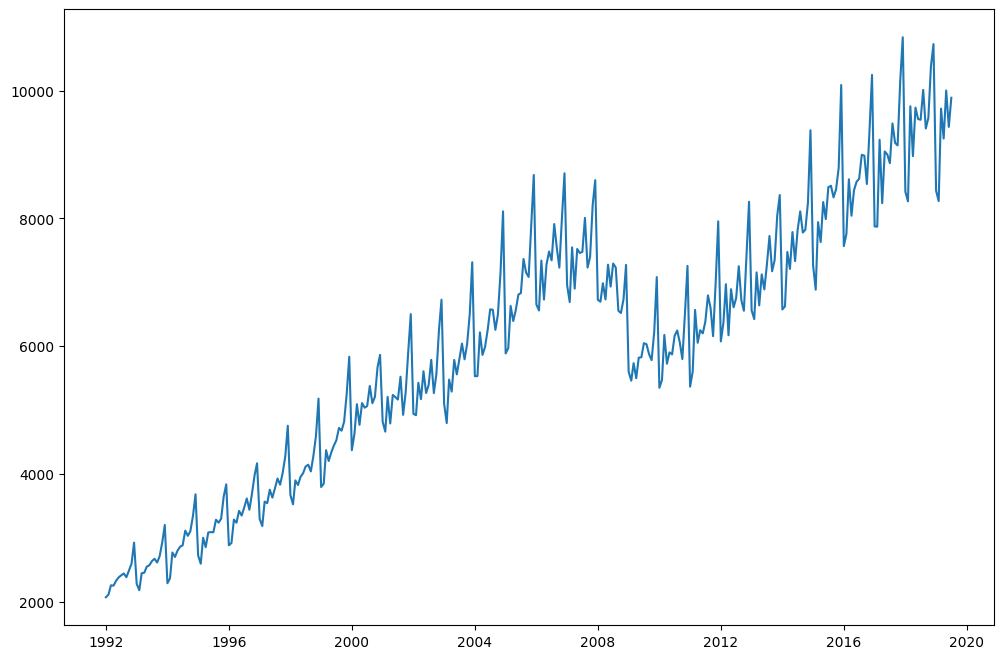

In [30]:
plt.figure(figsize=(12,8))
plt.plot(df);

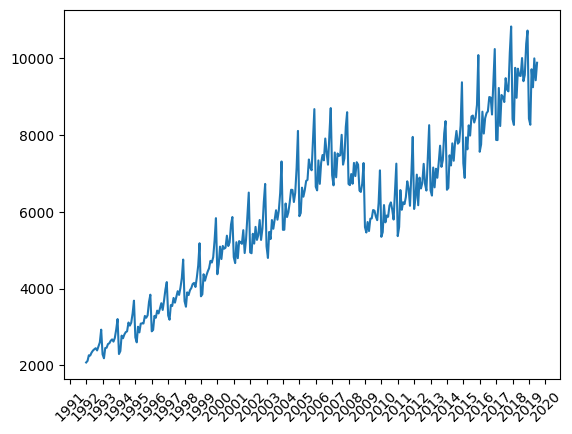

In [32]:
# import matplotlib.dates as mdates
# ax = plt.gca()
# # start by your date and then your data
# ax.plot(df) # daily data
# # You can change the step of range() as you prefer (now, it selects each third month) 
# ax.xaxis.set_major_locator(mdates.YearLocator(1,month=1,day=1))
# # you can change the format of the label (now it is 2016-Jan)  
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# plt.setp(ax.get_xticklabels(), rotation=45) 
# plt.show()

Podemos observar que tiene una tendencia positiva, tiene una estacionalidad anual, cada año se está repitiendo un mismo patrón. Todo esto nos hace indicar que la serie temporal no es estacionaria.

## 5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?

In [35]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['furniture_price_adjusted'])
result[1]

0.7035529748089995

Como el nivel de significación (p-valor) es mayor a 0.05, nos quedamos con la hipótesis nula de que no es estacionaria, y rechazaremos la hipótesis alternativa de que es estacionaria.

In [38]:
round(len(df)/4)

83

In [41]:
df[:round(len(df)/4)].describe()

,furniture_price_adjusted
count,83.000000
mean,3179.712834
std,645.076687
min,2073.432724
25%,2628.401474
50%,3115.400080
75%,3678.728807
max,4756.618689


In [42]:
df[round(len(df)/4):166].describe()

,furniture_price_adjusted
count,83.000000
mean,5586.420706
std,856.515544
min,3798.332299
25%,5051.786181
50%,5477.943949
75%,6129.736767
max,8110.153770


In [43]:
df[166:249].describe()

,furniture_price_adjusted
count,83.000000
mean,6730.595530
std,798.525348
min,5349.481724
25%,6116.772258
50%,6720.135669
75%,7274.609062
max,8705.820949


In [44]:
df[249:].describe()

,furniture_price_adjusted
count,82.000000
mean,8435.975156
std,1076.063457
min,6424.962324
25%,7733.845623
50%,8391.364392
75%,9244.126372
max,10833.501852


Comprobamos también que varían los estadísticos con el tiempo, por lo tanto podemos volver a afirmar que esta serie no es estacionaria.

## 6. ¿Conoces algún método para representar mejor la tendencia?

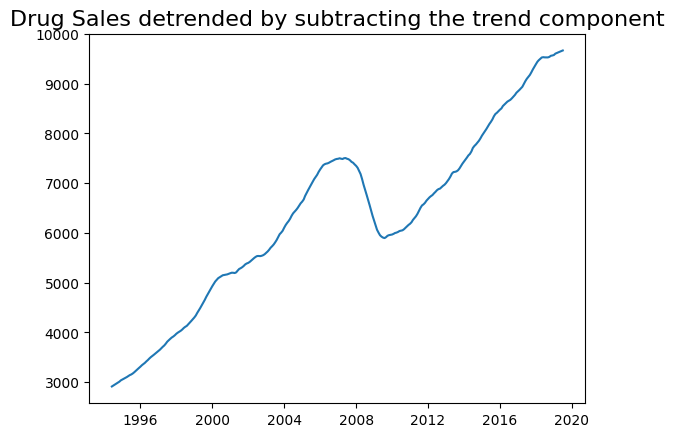

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df['furniture_price_adjusted'], model='multiplicative', extrapolate_trend='freq')
plt.plot(result_mul.trend)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16);

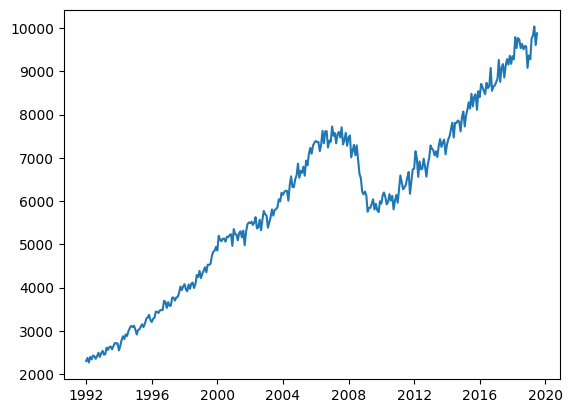

In [53]:
plt.plot(result_mul.trend * result_mul.resid)

## 7. Estaría bien visualizar todos los componentes de la serie temporal por separado

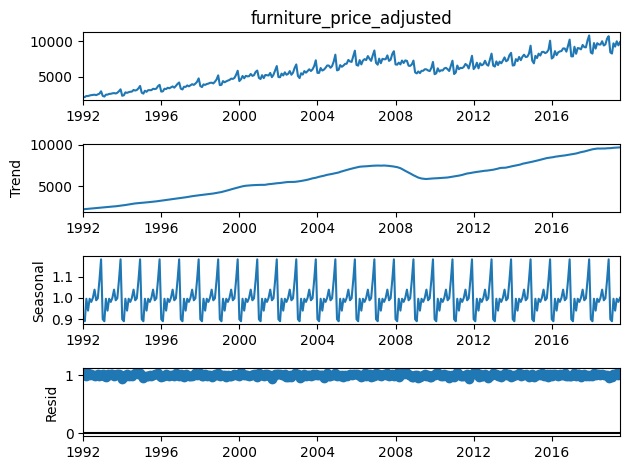

In [56]:
result_mul = result_mul.plot()

## 8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

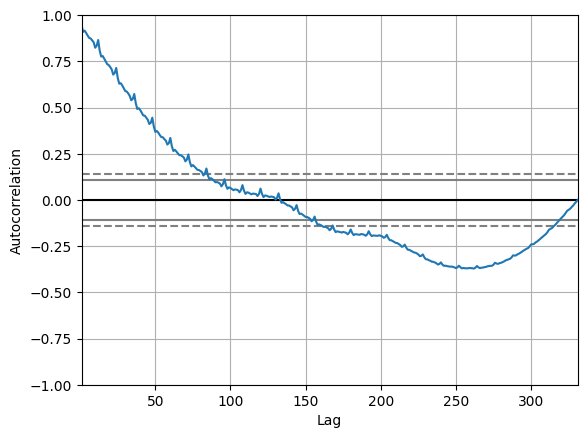

In [57]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['furniture_price_adjusted'].values);

<Figure size 1500x1000 with 0 Axes>

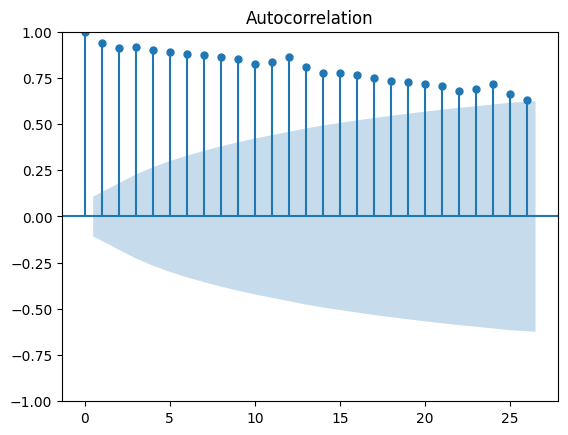

In [59]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(15,10))
plot_acf(df['furniture_price_adjusted']);

Podemos observar los picos de autocorrelación, que nos indica su estacionalidad, se repite un patrón cada año, es decir, cada 12 meses.

## 9. ¿Qué dependencia tiene cada instante de sus últimos 5 lags? Demuéstralo mediante una matriz de correlación.

In [62]:
df.shift(5).head(10)

,furniture_price_adjusted
Month,
1992-01-01,NaN
1992-02-01,NaN
1992-03-01,NaN
1992-04-01,NaN
1992-05-01,NaN
1992-06-01,2073.432724
1992-07-01,2114.485812
1992-08-01,2260.570891
1992-09-01,2255.103236


In [70]:
for i in range(24, 0, -1):
    df['t-'+ str(i)] = df['furniture_price_adjusted'].shift(i)

In [71]:
df.dropna(inplace= True)

In [72]:
df

,furniture_price_adjusted,t-5,t-4,t-3,t-2,t-1,t-24,t-23,t-22,t-21,...,t-15,t-14,t-13,t-12,t-11,t-10,t-9,t-8,t-7,t-6
Month,,,,,,,,,,,,,,,,,,,,,
1994-06-01,2864.542221,2293.212472,2370.922974,2773.780552,2704.471016,2802.466027,2384.638567,2417.165376,2445.498729,2387.351705,...,2449.195623,2457.704334,2552.874950,2575.018055,2639.280765,2675.420536,2617.522183,2715.938414,2935.795847,3205.014815
1994-07-01,2885.029337,2370.922974,2773.780552,2704.471016,2802.466027,2864.542221,2417.165376,2445.498729,2387.351705,2489.350838,...,2457.704334,2552.874950,2575.018055,2639.280765,2675.420536,2617.522183,2715.938414,2935.795847,3205.014815,2293.212472
1994-08-01,3115.400080,2773.780552,2704.471016,2802.466027,2864.542221,2885.029337,2445.498729,2387.351705,2489.350838,2598.186297,...,2552.874950,2575.018055,2639.280765,2675.420536,2617.522183,2715.938414,2935.795847,3205.014815,2293.212472,2370.922974
1994-09-01,3034.529846,2704.471016,2802.466027,2864.542221,2885.029337,3115.400080,2387.351705,2489.350838,2598.186297,2928.725684,...,2575.018055,2639.280765,2675.420536,2617.522183,2715.938414,2935.795847,3205.014815,2293.212472,2370.922974,2773.780552
1994-10-01,3109.513158,2802.466027,2864.542221,2885.029337,3115.400080,3034.529846,2489.350838,2598.186297,2928.725684,2284.619439,...,2639.280765,2675.420536,2617.522183,2715.938414,2935.795847,3205.014815,2293.212472,2370.922974,2773.780552,2704.471016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-01,9718.107698,9569.037851,10380.194097,10726.595075,8431.965334,8271.237355,9230.062726,8237.952382,9047.518982,8999.307096,...,10833.501852,8417.343128,8266.943270,9754.740971,8973.885759,9733.086145,9554.807941,9542.663403,10010.598100,9407.297340
2019-04-01,9248.814254,10380.194097,10726.595075,8431.965334,8271.237355,9718.107698,8237.952382,9047.518982,8999.307096,8864.093035,...,8417.343128,8266.943270,9754.740971,8973.885759,9733.086145,9554.807941,9542.663403,10010.598100,9407.297340,9569.037851
2019-05-01,10001.305304,10726.595075,8431.965334,8271.237355,9718.107698,9248.814254,9047.518982,8999.307096,8864.093035,9485.837200,...,8266.943270,9754.740971,8973.885759,9733.086145,9554.807941,9542.663403,10010.598100,9407.297340,9569.037851,10380.194097


<AxesSubplot:>

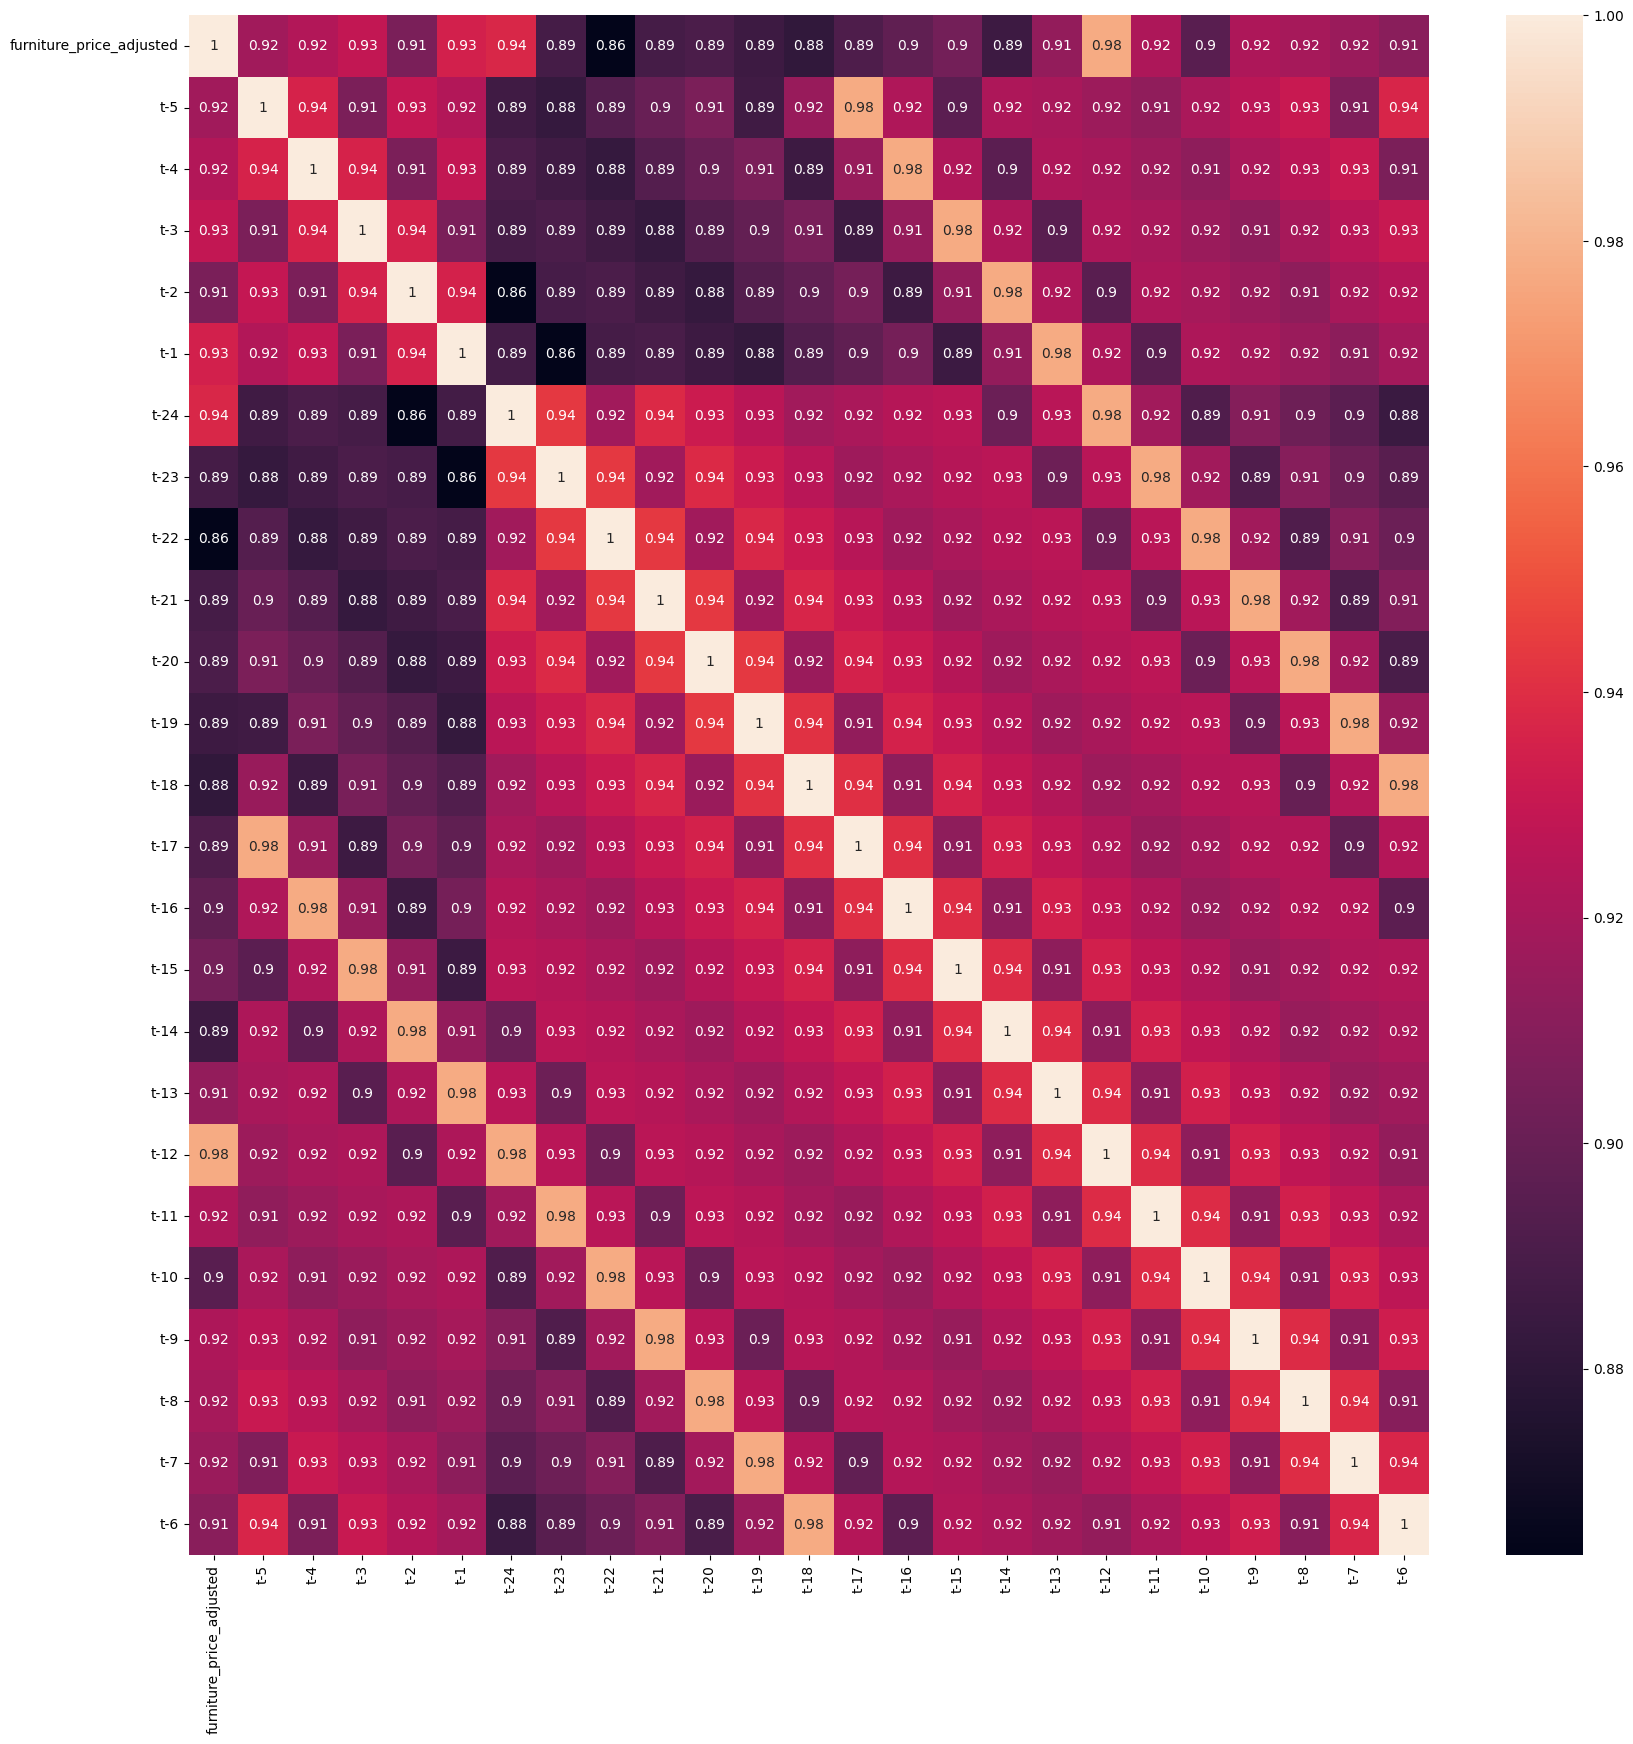

In [76]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot= True)

## 10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

##### Se cumple cada 12 meses

## 11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [80]:
result_mul.resid * result_mul.seasonal

Month
1994-06-01    0.983463
1994-07-01    0.983946
1994-08-01    1.055533
1994-09-01    1.021422
1994-10-01    1.039874
                ...   
2019-03-01    1.010512
2019-04-01    0.960453
2019-05-01    1.037236
2019-06-01    0.976846
2019-07-01    1.022786
Length: 302, dtype: float64